<a href="https://colab.research.google.com/github/ankitdv98/App-Behavior-Analysis/blob/master/App_behavior_analysis_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
%cd /content/drive/MyDrive/Kaggle
!ls

/content/drive/MyDrive/Kaggle
 appdata10.csv		       ipl_data			   test.csv
 car_brand_model_resnet50.h5   kaggle.json		   test.csv.zip
 creditcardfraud.zip	       lasso_regressor.pickle	   top_screens.csv
 final_submit.csv	      'Movie Sentiment Analysis'   train.csv
 flight_rf.pkl		       submit.csv		   train.csv.zip


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [6]:
df= pd.read_csv('appdata10.csv')

In [7]:
df.shape

(50000, 12)

In [8]:
df.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


#EDA

In [95]:
#Enrolled: Target Variable
df['enrolled'].value_counts(normalize= True)

1    0.62148
0    0.37852
Name: enrolled, dtype: float64

In [96]:
df.isnull().sum()

user                        0
first_open                  0
dayofweek                   0
hour                        0
age                         0
screen_list                 0
numscreens                  0
minigame                    0
used_premium_feature        0
enrolled                    0
enrolled_date           18926
liked                       0
dtype: int64

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   user                  50000 non-null  int64 
 1   first_open            50000 non-null  object
 2   dayofweek             50000 non-null  int64 
 3   hour                  50000 non-null  object
 4   age                   50000 non-null  int64 
 5   screen_list           50000 non-null  object
 6   numscreens            50000 non-null  int64 
 7   minigame              50000 non-null  int64 
 8   used_premium_feature  50000 non-null  int64 
 9   enrolled              50000 non-null  int64 
 10  enrolled_date         31074 non-null  object
 11  liked                 50000 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 4.6+ MB


In [9]:
num_col= ['dayofweek', 'age', 'numscreens', 'minigame', 'used_premium_feature', 'enrolled', 'liked']
df_num= df[num_col]

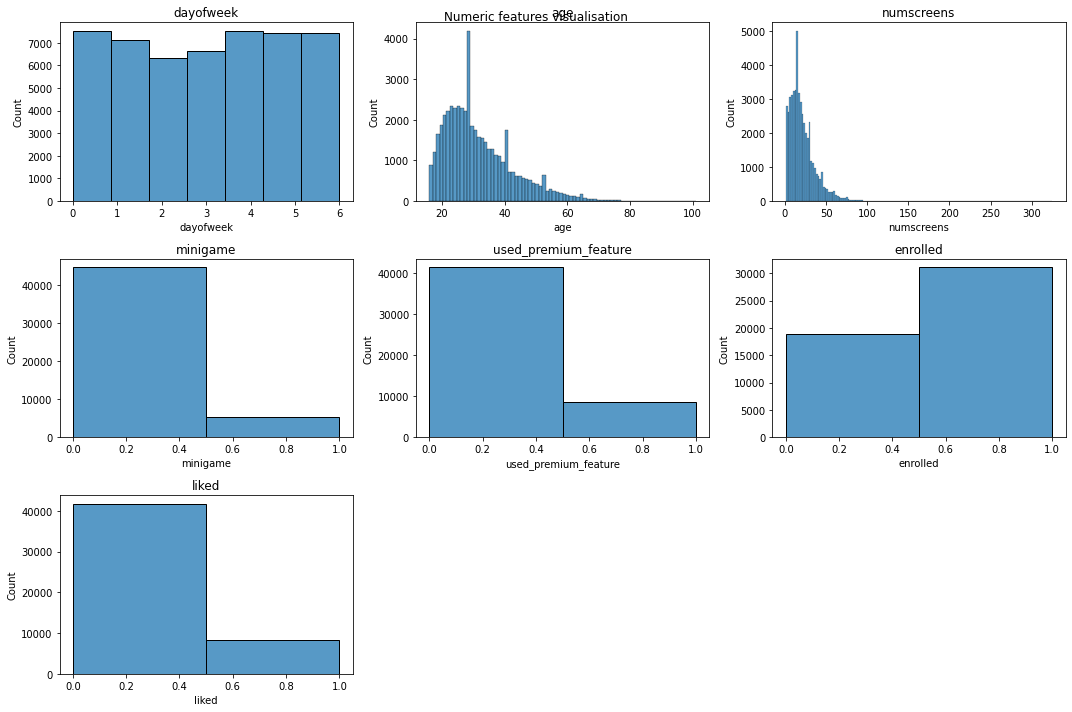

In [125]:
plt.figure(figsize= (15, 10))
plt.suptitle("Numeric features visualisation")
for i in range(1, df[num_col].shape[1]+1):
  plt.subplot(3, 3, i)
  plt.title(df_num.columns[i-1])

  val= np.size(df_num.iloc[:, i-1].unique())
  sns.histplot(df_num.iloc[:, i-1], bins= val)
plt.tight_layout()
plt.show()  

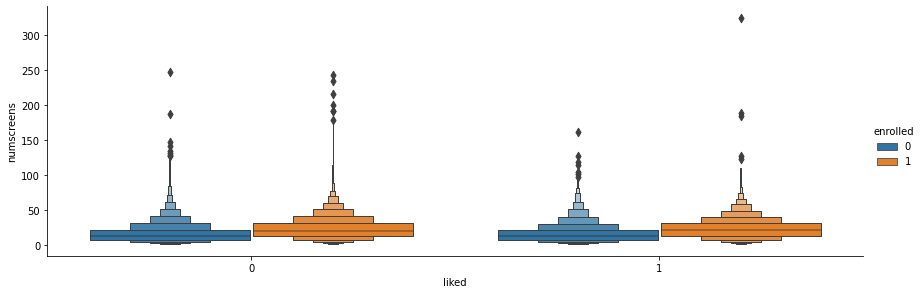

In [127]:
sns.catplot(y= 'numscreens', x= 'liked', hue= 'enrolled', data= df.sort_values("numscreens", ascending = False), 
            kind= 'boxen', height= 4, aspect= 3)
plt.show()

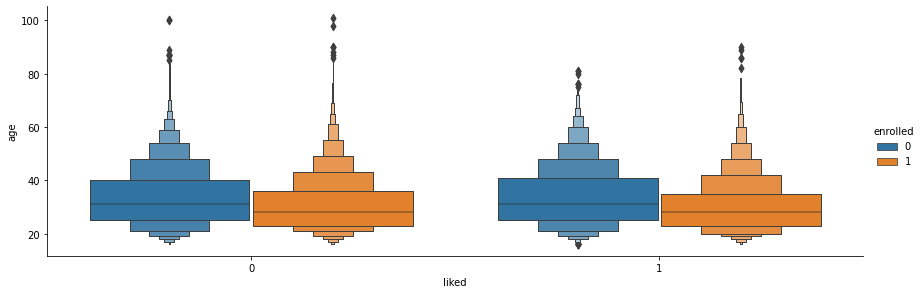

In [132]:
sns.catplot(y= 'age', x= 'liked', hue= 'enrolled', data= df.sort_values("age", ascending = False), 
            kind= 'boxen', height= 4, aspect= 3)
plt.show()

# Majority of users belong to age grp < 50: 

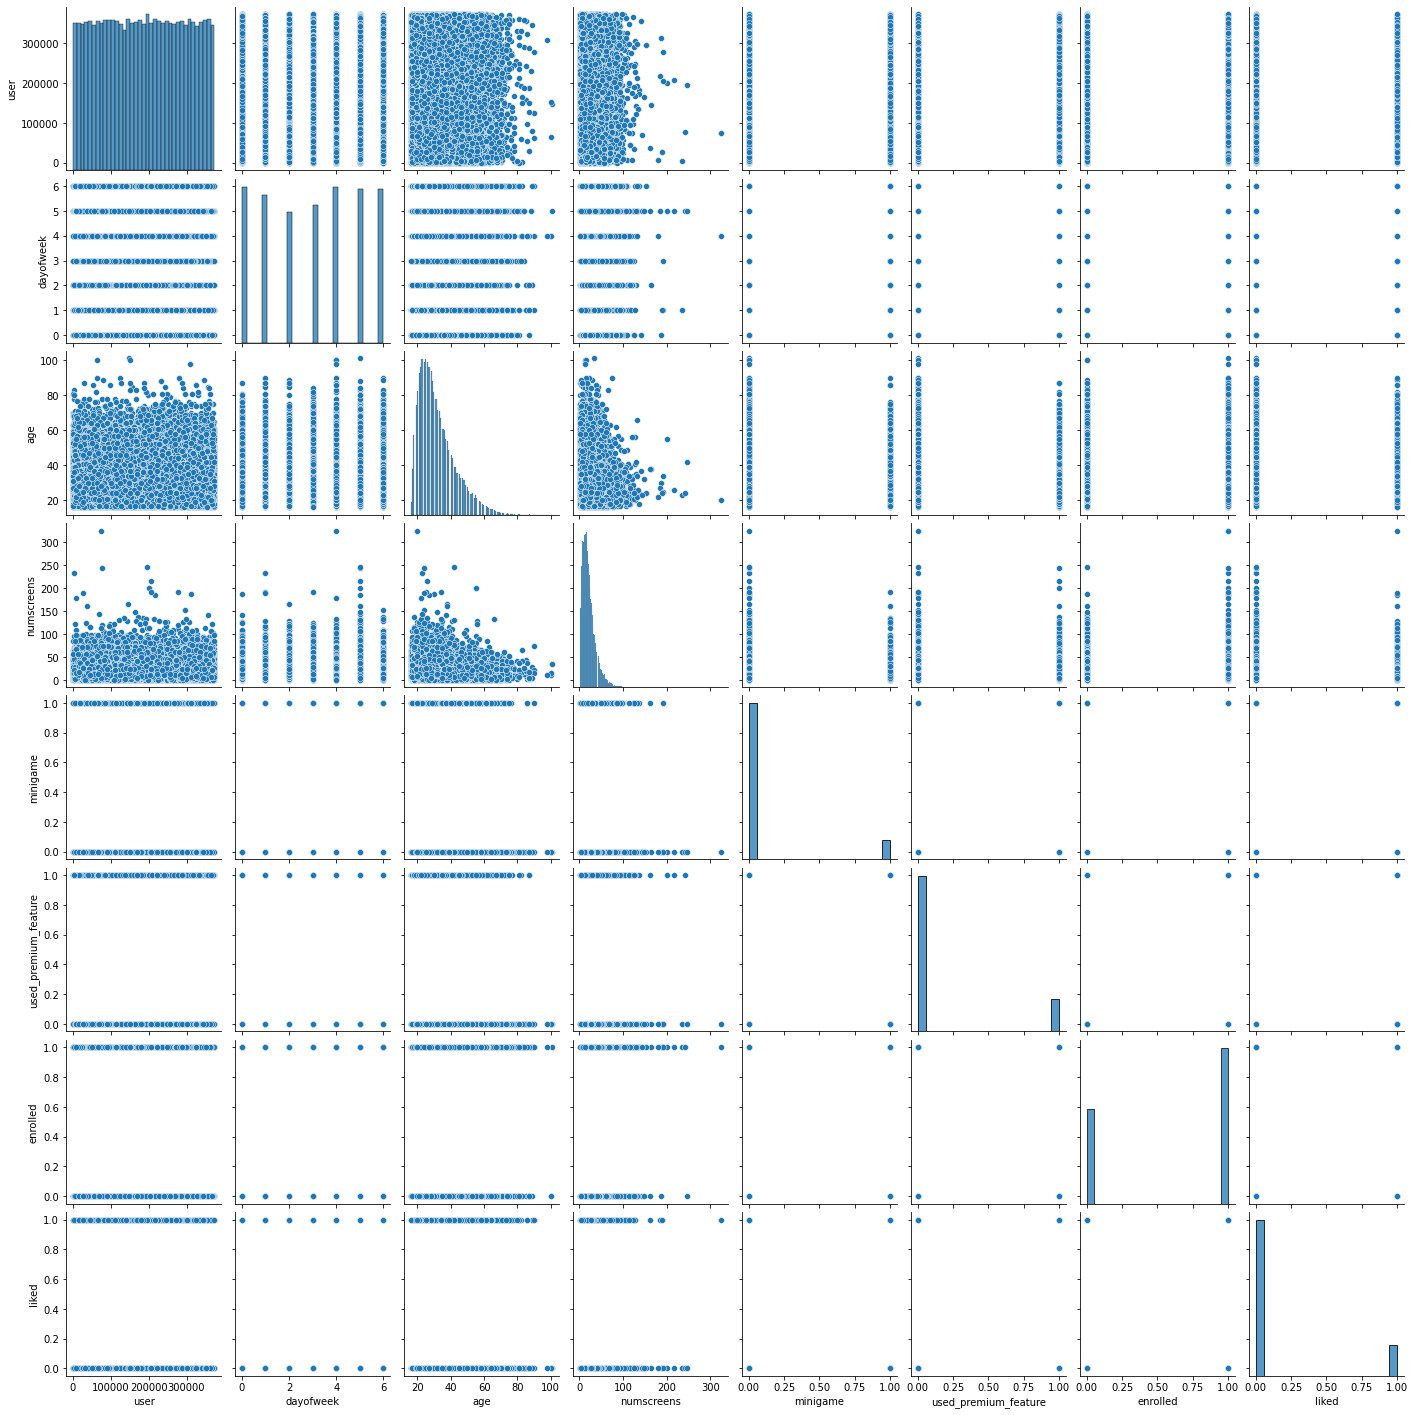

In [133]:
sns.pairplot(df)

#Feature Engineering

In [10]:
df.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [11]:
df['first_open']= pd.to_datetime(df['first_open'])
df['enrolled_date']= pd.to_datetime(df['enrolled_date'])

In [12]:
df['hour'][0]

' 02:00:00'

In [13]:
df['hour'][0].strip()

'02:00:00'

In [14]:
df['hour']= [x.strip() for x in df['hour']]

In [15]:
df['hour'][0]

'02:00:00'

In [16]:
df['hour']= pd.to_datetime(df['hour'], format= '%H:%M:%S').dt.hour

In [17]:
df.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaT,0
1,333588,2012-12-02 01:16:00.905,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaT,0
2,254414,2013-03-19 19:19:09.157,1,19,23,"Splash,Cycle,Loan",3,0,1,0,NaT,1
3,234192,2013-07-05 16:08:46.354,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [18]:
df['diffenece_hour']= (df['enrolled_date'] - df['first_open']).astype('timedelta64[h]')

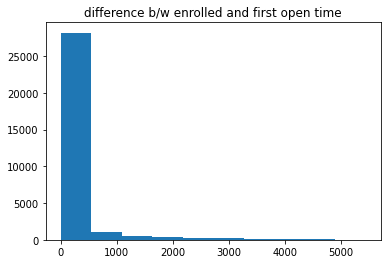

In [19]:
plt.hist(df['diffenece_hour'])
plt.title('difference b/w enrolled and first open time')
plt.show()

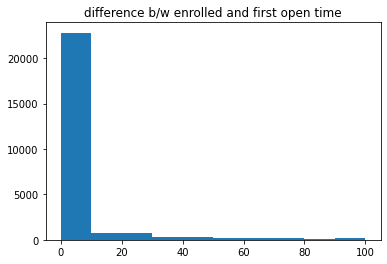

In [20]:
plt.hist(df['diffenece_hour'], range= (0, 100))
plt.title('difference b/w enrolled and first open time')
plt.show()

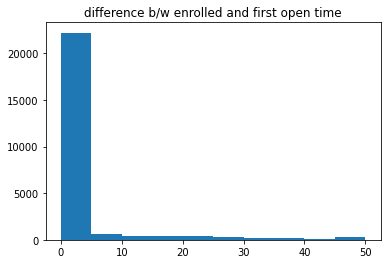

In [21]:
plt.hist(df['diffenece_hour'], range= (0, 50))
plt.title('difference b/w enrolled and first open time')
plt.show()

# Majorly people enrolss within early hours 
# Hence counting others as Not enrolled so that they can be given some bonus or other offers for enrolling

In [22]:
df.loc[df['diffenece_hour']> 40, 'enrolled']= 0

In [23]:
df['enrolled'].head()

0    0
1    0
2    0
3    1
4    1
Name: enrolled, dtype: int64

In [24]:
df['enrolled'].value_counts(normalize= True)

0    0.50854
1    0.49146
Name: enrolled, dtype: float64

In [25]:
df.isnull().sum()

user                        0
first_open                  0
dayofweek                   0
hour                        0
age                         0
screen_list                 0
numscreens                  0
minigame                    0
used_premium_feature        0
enrolled                    0
enrolled_date           18926
liked                       0
diffenece_hour          18926
dtype: int64

In [26]:
df.drop(columns= ['user','first_open','enrolled_date','diffenece_hour'], axis= 1, inplace= True)

In [27]:
df['screen_list'].unique()

array(['idscreen,joinscreen,Cycle,product_review,ScanPreview,VerifyDateOfBirth,VerifyPhone,VerifyToken,ProfileVerifySSN,Loan2,Settings,ForgotPassword,Login',
       'joinscreen,product_review,product_review2,ScanPreview,VerifyDateOfBirth,location,VerifyCountry,VerifyPhone,VerifyToken,Institutions,Loan2',
       'Splash,Cycle,Loan', ...,
       'joinscreen,product_review,product_review2,ScanPreview,VerifyCountry,VerifyPhone,VerifyToken,VerifyDateOfBirth,location,Home',
       'Cycle,Home,product_review,product_review,product_review3,ScanPreview,VerifyDateOfBirth,location,VerifyCountry,VerifyPhone,VerifyToken,product_review,product_review,VerifySSN,product_review,SelectInstitution,BankVerification,product_review,product_review',
       'product_review,ScanPreview,VerifyDateOfBirth,VerifyCountry,ProfileVerifySSN,ProfilePage,ProfileEducation,ProfileEducationMajor,Saving2Amount,Saving8,ProfileMaritalStatus,ProfileChildren,Saving2,Saving9,Saving7,Saving6,Saving5,Home,Loan2'],
      dtype=obj

In [28]:
top_screens= pd.read_csv('top_screens.csv')

In [29]:
top_screens= top_screens['top_screens'].values

In [30]:
top_screens

array(['Loan2', 'location', 'Institutions', 'Credit3Container',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth',
       'ProfilePage', 'VerifyCountry', 'Cycle', 'idscreen',
       'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash', 'Loan',
       'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts',
       'Saving8', 'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'Saving7', 'ProfileEducationMajor', 'Rewards', 'AccountView',
       'VerifyAnnualIncome', 'VerifyIncomeType', 'Saving2', 'Saving6',
       'Saving2Amount', 'Saving5', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'Loan4',
       'ResendToken', 'TransactionList', 'NetworkFailure', 'ListPicker'],
      dtype=object)

In [31]:
df['screen_list'].str.contains('location').astype(int)

0        0
1        1
2        0
3        1
4        0
        ..
49995    0
49996    0
49997    1
49998    1
49999    0
Name: screen_list, Length: 50000, dtype: int64

In [32]:
for sc in top_screens:
  df[sc]= df['screen_list'].str.contains(sc).astype(int)
  df['screen_list']= df['screen_list'].str.replace(sc+',', "")

In [33]:
df.head()

,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,liked,Loan2,location,Institutions,Credit3Container,VerifyPhone,BankVerification,VerifyDateOfBirth,ProfilePage,VerifyCountry,Cycle,idscreen,Credit3Dashboard,Loan3,CC1Category,Splash,Loan,CC1,RewardsContainer,Credit3,Credit1,EditProfile,Credit2,Finances,CC3,Saving9,Saving1,Alerts,Saving8,Saving10,Leaderboard,Saving4,VerifyMobile,VerifyHousing,RewardDetail,VerifyHousingAmount,ProfileMaritalStatus,ProfileChildren,ProfileEducation,Saving7,ProfileEducationMajor,Rewards,AccountView,VerifyAnnualIncome,VerifyIncomeType,Saving2,Saving6,Saving2Amount,Saving5,ProfileJobTitle,Login,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker
0,3,2,23,"joinscreen,product_review,ScanPreview,VerifyTo...",15,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,0,1,1,1,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,19,23,Loan,3,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,16,28,"product_review,Home,product_review,ReferralCon...",40,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,18,31,"joinscreen,ScanPreview,VerifySSN,Home,SelectIn...",32,0,0,1,1,1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [34]:
df['other']= df['screen_list'].str.count(',')

In [35]:
df.drop(columns= ['screen_list'], axis= 1, inplace= True)

In [36]:
df.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,Loan2,location,Institutions,Credit3Container,VerifyPhone,BankVerification,VerifyDateOfBirth,ProfilePage,VerifyCountry,Cycle,idscreen,Credit3Dashboard,Loan3,CC1Category,Splash,Loan,CC1,RewardsContainer,Credit3,Credit1,EditProfile,Credit2,Finances,CC3,Saving9,Saving1,Alerts,Saving8,Saving10,Leaderboard,Saving4,VerifyMobile,VerifyHousing,RewardDetail,VerifyHousingAmount,ProfileMaritalStatus,ProfileChildren,ProfileEducation,Saving7,ProfileEducationMajor,Rewards,AccountView,VerifyAnnualIncome,VerifyIncomeType,Saving2,Saving6,Saving2Amount,Saving5,ProfileJobTitle,Login,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker,other
0,3,2,23,15,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,7
1,6,1,24,13,0,0,0,0,1,1,1,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
2,1,19,23,3,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,16,28,40,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6
4,1,18,31,32,0,0,1,1,1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9


In [37]:
sorted(top_screens)

['AccountView',
 'Alerts',
 'BankVerification',
 'CC1',
 'CC1Category',
 'CC3',
 'Credit1',
 'Credit2',
 'Credit3',
 'Credit3Container',
 'Credit3Dashboard',
 'Cycle',
 'EditProfile',
 'Finances',
 'Institutions',
 'Leaderboard',
 'ListPicker',
 'Loan',
 'Loan2',
 'Loan3',
 'Loan4',
 'Login',
 'NetworkFailure',
 'ProfileChildren ',
 'ProfileEducation',
 'ProfileEducationMajor',
 'ProfileEmploymentLength',
 'ProfileJobTitle',
 'ProfileMaritalStatus',
 'ProfilePage',
 'ResendToken',
 'RewardDetail',
 'Rewards',
 'RewardsContainer',
 'Saving1',
 'Saving10',
 'Saving2',
 'Saving2Amount',
 'Saving4',
 'Saving5',
 'Saving6',
 'Saving7',
 'Saving8',
 'Saving9',
 'SecurityModal',
 'Splash',
 'TransactionList',
 'VerifyAnnualIncome',
 'VerifyCountry',
 'VerifyDateOfBirth',
 'VerifyHousing',
 'VerifyHousingAmount',
 'VerifyIncomeType',
 'VerifyMobile',
 'VerifyPhone',
 'WebView',
 'idscreen',
 'location']

In [38]:
# Combining similar columns such Saving1 Saving2
cc_screens= ['CC1', 'CC1Category', 'CC3']
df['cc_count']= df[cc_screens].sum(axis= 1)

In [39]:
df.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,Loan2,location,Institutions,Credit3Container,VerifyPhone,BankVerification,VerifyDateOfBirth,ProfilePage,VerifyCountry,Cycle,idscreen,Credit3Dashboard,Loan3,CC1Category,Splash,Loan,CC1,RewardsContainer,Credit3,Credit1,EditProfile,Credit2,Finances,CC3,Saving9,Saving1,Alerts,Saving8,Saving10,Leaderboard,Saving4,VerifyMobile,VerifyHousing,RewardDetail,VerifyHousingAmount,ProfileMaritalStatus,ProfileChildren,ProfileEducation,Saving7,ProfileEducationMajor,Rewards,AccountView,VerifyAnnualIncome,VerifyIncomeType,Saving2,Saving6,Saving2Amount,Saving5,ProfileJobTitle,Login,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker,other,cc_count
0,3,2,23,15,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,7,0
1,6,1,24,13,0,0,0,0,1,1,1,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0
2,1,19,23,3,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,16,28,40,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0
4,1,18,31,32,0,0,1,1,1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,0


In [40]:
df.drop(cc_screens, axis= 1, inplace=True)

In [41]:
credit_screens= ['Credit1', 'Credit2', 'Credit3', 'Credit3Container', 'Credit3Dashboard']
df['credit_count']= df[credit_screens].sum(axis= 1)
df.drop(credit_screens, axis= 1, inplace= True)

In [42]:
df.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,Loan2,location,Institutions,VerifyPhone,BankVerification,VerifyDateOfBirth,ProfilePage,VerifyCountry,Cycle,idscreen,Loan3,Splash,Loan,RewardsContainer,EditProfile,Finances,Saving9,Saving1,Alerts,Saving8,Saving10,Leaderboard,Saving4,VerifyMobile,VerifyHousing,RewardDetail,VerifyHousingAmount,ProfileMaritalStatus,ProfileChildren,ProfileEducation,Saving7,ProfileEducationMajor,Rewards,AccountView,VerifyAnnualIncome,VerifyIncomeType,Saving2,Saving6,Saving2Amount,Saving5,ProfileJobTitle,Login,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker,other,cc_count,credit_count
0,3,2,23,15,0,0,0,0,1,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,7,0,0
1,6,1,24,13,0,0,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0
2,1,19,23,3,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,16,28,40,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,3
4,1,18,31,32,0,0,1,1,1,0,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,0,2


In [43]:
loan_screens= ['Loan', 'Loan2', 'Loan3', 'Loan4']
df['loan_count']= df[loan_screens].sum(axis= 1)
df.drop(loan_screens, axis= 1, inplace= True)

In [44]:
profile_screens= ['ProfileChildren ', 'ProfileEducation', 'ProfileEducationMajor', 'ProfileEmploymentLength', 
                  'ProfileJobTitle', 'ProfileMaritalStatus', 'ProfilePage']
df['profile_count']= df[profile_screens].sum(axis= 1)
df.drop(profile_screens, axis= 1, inplace= True)

In [45]:
saving_screens= ['Saving1', 'Saving10', 'Saving2', 'Saving2Amount', 'Saving4', 'Saving5', 'Saving6', 'Saving7', 'Saving8', 'Saving9',]
df['saving_count']= df[saving_screens].sum(axis= 1)
df.drop(saving_screens, axis= 1, inplace= True)


In [46]:
verify_screens= ['VerifyAnnualIncome', 'VerifyCountry', 'VerifyDateOfBirth', 
                 'VerifyHousing', 'VerifyHousingAmount', 
                 'VerifyIncomeType', 'VerifyMobile', 'VerifyPhone',]
df['verify_count']= df[verify_screens].sum(axis= 1)
df.drop(verify_screens, axis= 1, inplace= True)

In [47]:
df.shape

(50000, 36)

In [48]:
df.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,Institutions,BankVerification,Cycle,idscreen,Splash,RewardsContainer,EditProfile,Finances,Alerts,Leaderboard,RewardDetail,Rewards,AccountView,Login,WebView,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,other,cc_count,credit_count,loan_count,profile_count,saving_count,verify_count
0,3,2,23,15,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,7,0,0,1,0,0,2
1,6,1,24,13,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,2,0,0,3
2,1,19,23,3,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,4,16,28,40,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0,0,0,0,0,0,6,0,3,1,0,0,2
4,1,18,31,32,0,0,1,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,0,2,1,0,0,2


# Model Creation

In [49]:
from sklearn.model_selection import train_test_split
X= df.drop('enrolled', axis= 1)
y= df['enrolled']
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.25, random_state= 0)

In [50]:
X_train.shape, y_train.shape

((37500, 35), (37500,))

In [51]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()
rf.fit(X_train, y_train)
pred= rf.predict(X_test)

In [52]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.77      0.80      0.78      6356
           1       0.78      0.75      0.77      6144

    accuracy                           0.78     12500
   macro avg       0.78      0.78      0.78     12500
weighted avg       0.78      0.78      0.78     12500



#Hyperparameter Tuning

In [53]:
from sklearn.model_selection import RandomizedSearchCV

In [57]:
n_estimators= [int(x) for x in np.linspace(100, 1200, 12)]
max_depth= [int(x) for x in np.linspace(5, 30, 6)]
max_features= ['auto', 'sqrt']
criterion= ['gini', 'entropy']
min_samples_split= [2,5,10,12,14,20]
min_samples_leaf= [1, 2, 3, 5, 10]

In [58]:
random_grid= {'n_estimators': n_estimators,
              'max_depth': max_depth,
              'max_features': max_features,
              'criterion': criterion,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf}

In [59]:
rf_random= RandomizedSearchCV(estimator= rf, param_distributions= random_grid, scoring= 'accuracy', 
                              n_iter= 10, cv= 10, verbose= 2, random_state= 42, n_jobs= -1)

In [60]:
rf_random.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 21.0min finished


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
              

In [61]:
rf_random.best_params_

{'criterion': 'entropy',
 'max_depth': 30,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 12,
 'n_estimators': 700}

In [63]:
best_model= rf_random.best_params_
best_model

{'criterion': 'entropy',
 'max_depth': 30,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 12,
 'n_estimators': 700}

In [67]:
y_pred= rf_random.predict(X_test)

In [69]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.81      0.79      6356
           1       0.79      0.75      0.77      6144

    accuracy                           0.78     12500
   macro avg       0.78      0.78      0.78     12500
weighted avg       0.78      0.78      0.78     12500



Accuracy Score:  0.78072


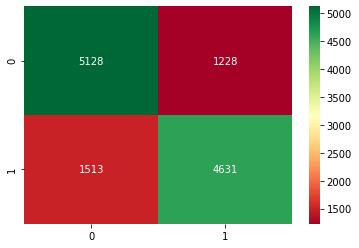

In [88]:
print("Accuracy Score: ",accuracy_score(y_test, y_pred))
cm= confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot= True, fmt= 'g', cmap= 'RdYlGn')
plt.show()